# Early Model Testing

In [71]:
%matplotlib inline
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import numpy as np
import os
import time

### Load dataset

In [72]:
input_file_name = "lotOfFeatures.csv"
input_file_path = os.path.join(os.path.join(os.getcwd(), "data"), input_file_name)

original_data = pd.read_csv(input_file_path, index_col=0, parse_dates=True)
originalSize = original_data.shape[1]
original_data.head()
original_data.shape

(140350, 445)

## Excluding Testing Set

Spliting the dataset into three parts: training, testing and evaluation (last 10 percent).

In [73]:
#start_time = '2012-02-01 00:00:00'
start_time = '2014-02-01 00:00:00'
splitting_point = int(0.9 * original_data.shape[0])
splitting_time = original_data.iloc[[splitting_point]].index.to_pydatetime()[0]
#data = original_data[:splitting_time]
data = original_data[start_time:]

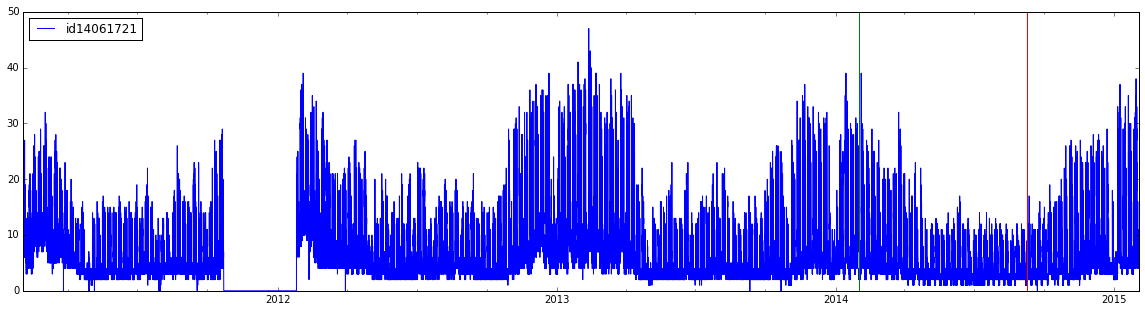

In [74]:
f = original_data[["id14061721"]].plot(figsize=(20,5)) 
original_data.iloc(splitting_point)
f.axvline(start_time, color='g')
f.axvline(splitting_time, color='r')

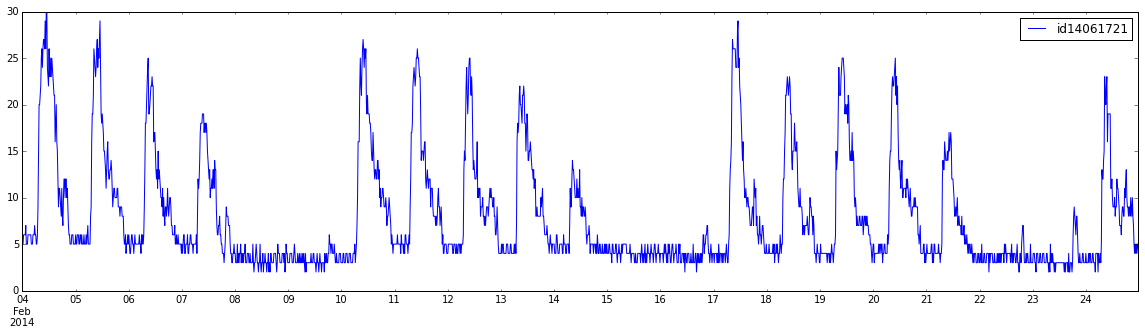

In [75]:
data['2014-02-04':'2014-02-24'][["id14061721"]].plot(figsize=(20,5))  

## Creating Feature Sets

In [76]:
target_col = 'id14061721'

In [77]:
sensor_cols_to_drop = [col for col in list(data) if col.startswith('id') and not col.startswith(target_col)]
#[col for col in list(data) if col not in sensor_cols_to_drop]
data.drop(sensor_cols_to_drop, axis=1, inplace=True)
list(data)

C:\Python27\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


['id14061721',
 'p',
 't2m_termin',
 'rh_termin',
 'padavine',
 'veter_hitrost',
 'veter_vek_smer',
 'energija_gl',
 'energija_di',
 'HourOfDay',
 'DayOfWeek',
 'Month',
 'Weekday',
 'Weekend',
 'Holiday',
 'DayBeforeHoliday',
 'DayAfterHodliay',
 'BusinessDay',
 'id14061721_roll_mean_1h',
 'id14061721_roll_mean_6h',
 'id14061721_roll_mean_d',
 'id14061721_roll_mean_w',
 'id14061721_roll_mean_m',
 'id14061721_roll_min2_d',
 'id14061721_roll_min2_w',
 'id14061721_roll_max2_d',
 'id14061721_roll_max2_w',
 'id14061721_roll_var_6h',
 'id14061721_roll_var_d',
 'id14061721_roll_var_w',
 'p_roll_mean_1h',
 'p_roll_mean_6h',
 'p_roll_mean_d',
 'p_roll_mean_w',
 'p_roll_mean_m',
 'p_roll_var_1h',
 'p_roll_var_d',
 't2m_termin_roll_mean_1h',
 't2m_termin_roll_mean_6h',
 't2m_termin_roll_mean_d',
 't2m_termin_roll_mean_w',
 't2m_termin_roll_mean_m',
 't2m_termin_roll_min2_d',
 't2m_termin_roll_min2_w',
 't2m_termin_roll_max2_d',
 't2m_termin_roll_max2_w',
 't2m_termin_roll_var_1h',
 't2m_termin_r

In [78]:
columnsToShift = list(data)
shiftedColumns = ["shifted_" + col for col in columnsToShift]

In [79]:
measurements_cols = [col for col in list(data) if col.startswith(target_col)]

wetaher_current_cols =  ['p', 't2m_termin', 'rh_termin', 'padavine', 'veter_hitrost', 'veter_vek_smer', 'energija_gl',
 'energija_di', 'p_roll_mean_1h', 'p_roll_mean_6h', 'p_roll_mean_d', 'p_roll_mean_w', 'p_roll_mean_m', 'p_roll_var_1h',
 'p_roll_var_d', 't2m_termin_roll_mean_1h', 't2m_termin_roll_mean_6h', 't2m_termin_roll_mean_d', 't2m_termin_roll_mean_w',
 't2m_termin_roll_mean_m', 't2m_termin_roll_min2_d', 't2m_termin_roll_min2_w', 't2m_termin_roll_max2_d',
 't2m_termin_roll_max2_w', 't2m_termin_roll_var_1h', 't2m_termin_roll_var_d', 'rh_termin_roll_mean_1h',
 'rh_termin_roll_mean_6h', 'rh_termin_roll_mean_d', 'rh_termin_roll_mean_w', 'rh_termin_roll_mean_m',
 'rh_termin_roll_min2_d', 'rh_termin_roll_min2_w', 'rh_termin_roll_max2_d', 'rh_termin_roll_max2_w',
 'rh_termin_roll_var_1h', 'rh_termin_roll_var_d', 'energija_gl_roll_mean_1h', 'energija_gl_roll_mean_6h',
 'energija_gl_roll_mean_d', 'energija_gl_roll_mean_w', 'energija_gl_roll_mean_m', 'energija_gl_roll_var_1h',
 'energija_gl_roll_var_d']

weather_forecasted_cols =  ['shifted_p', 'shifted_t2m_termin', 'shifted_rh_termin', 'shifted_padavine', 
                            'shifted_veter_hitrost', 'shifted_veter_vek_smer', 'shifted_energija_gl']

date_time_cols =  ['shifted_HourOfDay', 'shifted_DayOfWeek', 'shifted_Month', 'shifted_Weekday', 'shifted_Weekend', 
                   'shifted_Holiday', 'shifted_DayBeforeHoliday', 'shifted_DayAfterHodliay', 'shifted_BusinessDay', 
                   'shifted_BusinessDay_sum', 'shifted_Holiday_sum']

In [80]:
all_cols = measurements_cols + wetaher_current_cols + weather_forecasted_cols + date_time_cols 
m_wc_wf_cols = measurements_cols + wetaher_current_cols + weather_forecasted_cols
m_wc_dt_cols = measurements_cols + wetaher_current_cols + date_time_cols 
m_wf_dt_cols = measurements_cols + weather_forecasted_cols + date_time_cols 
m_dt_cols = measurements_cols + date_time_cols 
m_cols = measurements_cols

## Define Machine Learning Models and Data Sets

In [81]:
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import svm
from sklearn import neighbors
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.learning_curve import learning_curve
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import explained_variance_score

## Prediction Results

In [82]:
data_sets = [{'name': "all_cols", 'cols': all_cols},
             #{'name': "m_wc_wf_cols", 'cols': m_wc_wf_cols},
             {'name': "m_wc_dt_cols", 'cols': m_wc_dt_cols},
             {'name': "m_wf_dt_cols", 'cols': m_wf_dt_cols},
             {'name': "m_dt_cols", 'cols': m_dt_cols},
             #{'name': "m_cols", 'cols': m_cols},
             ]

error_metrics = [{'name': "R2 Score", 'short': "R2", 'function': metrics.r2_score},
                 #{'name': "Explained Variance Score", 'short': "EV", 'function': metrics.explained_variance_score},
                 {'name': "Mean Absolute Error", 'short': "MAE", 'function': metrics.mean_absolute_error},
                 {'name': "Mean Squared Error", 'short': "MSE", 'function': metrics.mean_squared_error}
                ]

validation_df = pd.DataFrame(columns=pd.MultiIndex.from_arrays([[],[]], names=['dataset', 'error_metric']))

In [83]:
for horizon in range (1,25):
    print "\nWorking on prediction horizon: {}h".format(horizon)
        
    data[shiftedColumns] = data[columnsToShift].shift(horizon, freq='H')
    data.dropna(inplace=True)
    
    training_data = data[:splitting_time]
    testing_data = data[splitting_time:]
    
    for data_set in data_sets:
        #print "Dataset:\t {}".format(data_set['name'])
        model = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, n_jobs=7)
        
        X_train = training_data[data_set['cols']].values
        y_train = training_data[["shifted_" + target_col]].values.ravel()

        X_test = testing_data[data_set['cols']].values
        y_test = testing_data[["shifted_" + target_col]].values.ravel()

        start = time.time() # Start measuring time
        model.fit(X_train,y_train)
        runtime = time.time() - start # Calculate runtime

        for metric in error_metrics:

            error = metric['function'](y_test, model.predict(X_test))
            validation_df.loc[horizon, (data_set['name'], metric['short'])] = error
            #print "{}: {:.3f}".format(metric['name'], error)



Working on prediction horizon: 1h

Working on prediction horizon: 2h

Working on prediction horizon: 3h

Working on prediction horizon: 4h

Working on prediction horizon: 5h

Working on prediction horizon: 6h

Working on prediction horizon: 7h

Working on prediction horizon: 8h

Working on prediction horizon: 9h

Working on prediction horizon: 10h

Working on prediction horizon: 11h

Working on prediction horizon: 12h

Working on prediction horizon: 13h

Working on prediction horizon: 14h

Working on prediction horizon: 15h

Working on prediction horizon: 16h

Working on prediction horizon: 17h

Working on prediction horizon: 18h

Working on prediction horizon: 19h

Working on prediction horizon: 20h

Working on prediction horizon: 21h

Working on prediction horizon: 22h

Working on prediction horizon: 23h

Working on prediction horizon: 24h


C:\Python27\lib\site-packages\IPython\kernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [84]:
validation_df.loc['Mean'] = validation_df.mean()
validation_df

model         all_cols                     m_wc_dt_cols                      \
error_metric        R2       MAE       MSE           R2       MAE       MSE   
1             0.962512  0.715450  1.218943     0.962871  0.714033  1.207250   
2             0.927518  0.979086  2.356753     0.928868  0.969267  2.312833   
3             0.933746  0.953693  2.154165     0.933764  0.951767  2.153575   
4             0.936296  0.939055  2.071154     0.936289  0.938493  2.071360   
5             0.926673  0.965028  2.383870     0.926023  0.966292  2.404991   
6             0.902796  1.092850  3.160054     0.901000  1.093262  3.218458   
7             0.865605  1.326037  4.369195     0.862638  1.319960  4.465655   
8             0.873695  1.307245  4.106037     0.876219  1.304802  4.024001   
9             0.860979  1.361253  4.519207     0.874781  1.304366  4.070545   
10            0.847980  1.419336  4.941701     0.833896  1.497233  5.399547   
11            0.850684  1.431257  4.853733     0.821944  1.531540  5.787943   
12            0.866224  1.371317  4.348592     0.861121  1.375206  4.514477   
13            0.873613  1.326864  4.108685     0.869640  1.355826  4.237850   
14            0.857447  1.420798  4.634460     0.847227  1.467911  4.966697   
15            0.850604  1.465009  4.857739     0.841927  1.501993  5.139852   
16            0.856954  1.416037  4.651925     0.864163  1.351374  4.417486   
17            0.864455  1.385453  4.408596     0.857807  1.412299  4.624800   
18            0.864793  1.383877  4.398212     0.868849  1.358397  4.266283   
19            0.852130  1.434235  4.810969     0.869632  1.345646  4.241538   
20            0.828589  1.517531  5.577694     0.848435  1.444249  4.931925   
21            0.834977  1.484783  5.370729     0.853112  1.411145  4.780528   
22            0.824510  1.564188  5.712233     0.856299  1.418644  4.677504   
23            0.763840  1.691773  7.688305     0.810355  1.542805  6.174002   
24            0.782983  1.641228  7.066161     0.792403  1.609449  6.759436   
Mean          0.867067  1.316391  4.323713     0.870803  1.299415  4.202022   

model        m_wf_dt_cols                     m_dt_cols                      
error_metric           R2       MAE       MSE        R2       MAE       MSE  
1                0.963763  0.704185  1.178252  0.964262  0.700120  1.162019  
2                0.935110  0.944207  2.109889  0.935428  0.932902  2.099562  
3                0.934963  0.939935  2.114577  0.936159  0.928720  2.075712  
4                0.938684  0.923568  1.993517  0.938312  0.925569  2.005590  
5                0.929847  0.954736  2.280671  0.931053  0.948517  2.241468  
6                0.909993  1.066241  2.926087  0.906350  1.075724  3.044531  
7                0.875819  1.284868  4.037140  0.875232  1.279700  4.056230  
8                0.879767  1.277839  3.908673  0.883538  1.261399  3.786077  
9                0.864626  1.325710  4.400650  0.878711  1.277920  3.942798  
10               0.863899  1.320292  4.424215  0.874313  1.299906  4.085706  
11               0.866386  1.326825  4.343306  0.875252  1.290887  4.055095  
12               0.863477  1.332543  4.437890  0.879518  1.264367  3.916455  
13               0.875242  1.292099  4.055747  0.881008  1.257652  3.868277  
14               0.853176  1.355845  4.773308  0.858670  1.325295  4.594690  
15               0.840496  1.407664  5.186407  0.825750  1.390384  5.665879  
16               0.831653  1.430375  5.474736  0.816169  1.396562  5.978287  
17               0.836493  1.428445  5.318053  0.850651  1.354578  4.857550  
18               0.833149  1.468648  5.427594  0.864946  1.339456  4.393229  
19               0.818752  1.544834  5.896923  0.846469  1.390843  4.995160  
20               0.815115  1.551318  6.016149  0.851260  1.400620  4.839999  
21               0.818939  1.528298  5.892684  0.855106  1.372387  4.715634  
22               0.811484  1.559507  6.136230  0.850786  1.418902  4.856

NOTE: From this, it looks like weather does not help to improve accuracy. Date time features are the most important.

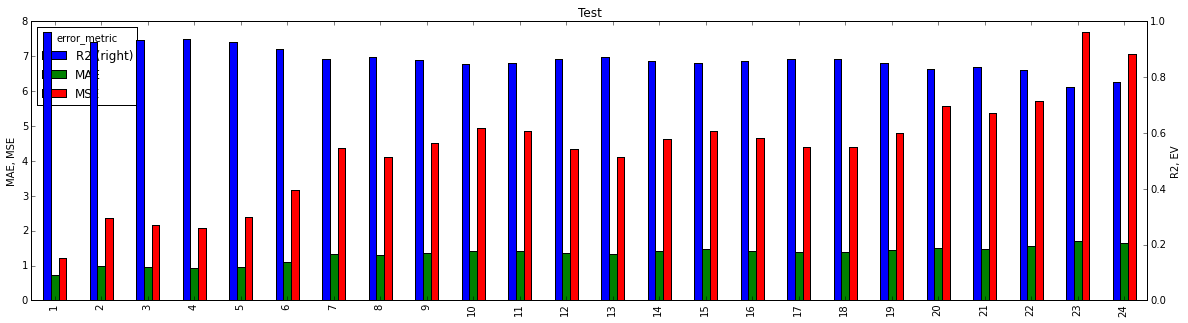

In [85]:
ax = validation_df['all_cols'].iloc[0:24].plot(kind='bar', figsize=(20,5), secondary_y=['R2'], title="Test")
ax.set_ylabel('MAE, MSE')
ax.right_ax.set_ylabel('R2')
#ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))


## Feature Importance

In [133]:
feature_importances = pd.DataFrame(index=all_cols)
feature_importances.index.name = "Feature"
feature_importances.columns.name = "Horizon"
#feature_importances

In [136]:
for horizon in range (1,25):
    print "\nWorking on prediction horizon: {}h".format(horizon)
        
    data[shiftedColumns] = data[columnsToShift].shift(horizon, freq='H')
    data.dropna(inplace=True)
    
    training_data = data[:splitting_time]
    testing_data = data[splitting_time:]
    
    model = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, n_jobs=7)

    X_train = training_data[all_cols].values
    y_train = training_data[["shifted_" + target_col]].values.ravel()

    X_test = testing_data[all_cols].values
    y_test = testing_data[["shifted_" + target_col]].values.ravel()

    start = time.time() # Start measuring time
    model.fit(X_train,y_train)
    runtime = time.time() - start # Calculate runtime
        
    feature_importances.loc[:,horizon] = model.feature_importances_


Working on prediction horizon: 1h

Working on prediction horizon: 2h

Working on prediction horizon: 3h

Working on prediction horizon: 4h

Working on prediction horizon: 5h

Working on prediction horizon: 6h

Working on prediction horizon: 7h

Working on prediction horizon: 8h

Working on prediction horizon: 9h

Working on prediction horizon: 10h

Working on prediction horizon: 11h

Working on prediction horizon: 12h

Working on prediction horizon: 13h

Working on prediction horizon: 14h

Working on prediction horizon: 15h

Working on prediction horizon: 16h

Working on prediction horizon: 17h

Working on prediction horizon: 18h

Working on prediction horizon: 19h

Working on prediction horizon: 20h

Working on prediction horizon: 21h

Working on prediction horizon: 22h

Working on prediction horizon: 23h

Working on prediction horizon: 24h


C:\Python27\lib\site-packages\IPython\kernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Horizon,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
Feature,,,,,,,,,,,,,,,,,,,,,
id14061721,6.697391e-03,1.227425e-03,2.948096e-03,2.620290e-03,4.568723e-04,3.158615e-04,9.048148e-04,7.048569e-04,6.893241e-04,1.011370e-03,...,3.298043e-04,9.275662e-04,2.704580e-04,3.529902e-02,1.130428e-03,0.000523,1.127583e-03,0.025231,3.725551e-01,7.609167e-02
id14061721_roll_mean_1h,9.204422e-01,8.561602e-02,1.225909e-02,1.334743e-02,6.512887e-03,3.644425e-03,3.049652e-03,1.775658e-03,3.095995e-03,6.180325e-03,...,3.753298e-03,7.396117e-03,2.415734e-03,2.038576e-03,1.393871e-03,0.002646,3.918198e-03,0.006941,3.119020e-03,3.741566e-01
id14061721_roll_mean_6h,1.675738e-02,8.158697e-01,9.036052e-01,8.602146e-01,7.295463e-01,4.372945e-01,3.569571e-01,2.594658e-01,7.414536e-02,4.019433e-02,...,1.031407e-02,1.990081e-02,6.088529e-03,8.213403e-03,1.000170e-02,0.011451,1.160346e-02,0.011283,1.235986e-02,7.038612e-03
id14061721_roll_mean_d,4.600081e-04,1.281331e-03,1.167865e-03,9.449027e-04,2.598817e-03,1.065921e-02,2.792697e-02,6.930641e-02,3.189577e-01,3.405560e-01,...,6.312000e-02,3.425651e-01,1.234865e-01,5.299077e-02,2.456184e-01,0.265559,2.539464e-01,0.117466,7.283170e-03,7.876420e-03
id14061721_roll_mean_w,6.891583e-04,5.581653e-04,5.103034e-04,5.485203e-04,5.030396e-04,9.178080e-04,1.613165e-03,2.191075e-03,1.579833e-03,1.382341e-03,...,1.469306e-03,1.686274e-03,2.053813e-03,1.496801e-03,1.883594e-03,0.001568,1.685783e-03,0.002340,7.576099e-03,1.781354e-02
id14061721_roll_mean_m,2.990186e-04,7.175677e-04,7.926149e-04,8.914779e-04,9.972263e-04,1.480764e-03,2.148242e-03,3.920707e-03,3.547990e-03,3.040665e-03,...,2.100431e-03,2.824190e-03,3.306899e-03,3.245651e-03,3.500775e-03,0.002913,3.681479e-03,0.003246,2.023056e-03,2.123132e-03
id14061721_roll_min2_d,2.957523e-05,6.685401e-05,1.364092e-04,6.704693e-04,9.541581e-04,1.160669e-03,1.526787e-03,2.621283e-03,2.385355e-03,2.589465e-03,...,5.323025e-03,4.851128e-03,3.512359e-03,3.796675e-03,2.704742e-03,0.001777,1.663214e-03,0.001969,1.472783e-03,1.378569e-03
id14061721_roll_min2_w,1.005549e-05,1.118174e-05,2.187734e-05,9.237470e-06,9.615179e-05,7.416728e-06,3.179719e-05,7.520147e-05,8.145956e-05,8.800498e-07,...,3.797911e-05,9.577267e-06,7.697823e-06,2.027444e-05,1.917485e-04,0.000123,5.258202e-05,0.000071,4.641428e-05,2.505114e-05
id14061721_roll_max2_d,2.254713e-04,1.408955e-03,7.231841e-04,2.981962e-04,2.213542e-03,1.126641e-02,2.732999e-02,5.729595e-03,1.150645e-02,9.946189e-03,...,4.179539e-03,6.438135e-03,4.961221e-03,4.032909e-03,7.162865e-03,0.003393,2.777237e-03,0.009718,2.815361e-02,3.272863e-02


In [137]:
feature_importances

Horizon,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
Feature,,,,,,,,,,,,,,,,,,,,,
id14061721,6.697391e-03,1.227425e-03,2.948096e-03,2.620290e-03,4.568723e-04,3.158615e-04,9.048148e-04,7.048569e-04,6.893241e-04,1.011370e-03,...,3.298043e-04,9.275662e-04,2.704580e-04,3.529902e-02,1.130428e-03,0.000523,1.127583e-03,0.025231,3.725551e-01,7.609167e-02
id14061721_roll_mean_1h,9.204422e-01,8.561602e-02,1.225909e-02,1.334743e-02,6.512887e-03,3.644425e-03,3.049652e-03,1.775658e-03,3.095995e-03,6.180325e-03,...,3.753298e-03,7.396117e-03,2.415734e-03,2.038576e-03,1.393871e-03,0.002646,3.918198e-03,0.006941,3.119020e-03,3.741566e-01
id14061721_roll_mean_6h,1.675738e-02,8.158697e-01,9.036052e-01,8.602146e-01,7.295463e-01,4.372945e-01,3.569571e-01,2.594658e-01,7.414536e-02,4.019433e-02,...,1.031407e-02,1.990081e-02,6.088529e-03,8.213403e-03,1.000170e-02,0.011451,1.160346e-02,0.011283,1.235986e-02,7.038612e-03
id14061721_roll_mean_d,4.600081e-04,1.281331e-03,1.167865e-03,9.449027e-04,2.598817e-03,1.065921e-02,2.792697e-02,6.930641e-02,3.189577e-01,3.405560e-01,...,6.312000e-02,3.425651e-01,1.234865e-01,5.299077e-02,2.456184e-01,0.265559,2.539464e-01,0.117466,7.283170e-03,7.876420e-03
id14061721_roll_mean_w,6.891583e-04,5.581653e-04,5.103034e-04,5.485203e-04,5.030396e-04,9.178080e-04,1.613165e-03,2.191075e-03,1.579833e-03,1.382341e-03,...,1.469306e-03,1.686274e-03,2.053813e-03,1.496801e-03,1.883594e-03,0.001568,1.685783e-03,0.002340,7.576099e-03,1.781354e-02
id14061721_roll_mean_m,2.990186e-04,7.175677e-04,7.926149e-04,8.914779e-04,9.972263e-04,1.480764e-03,2.148242e-03,3.920707e-03,3.547990e-03,3.040665e-03,...,2.100431e-03,2.824190e-03,3.306899e-03,3.245651e-03,3.500775e-03,0.002913,3.681479e-03,0.003246,2.023056e-03,2.123132e-03
id14061721_roll_min2_d,2.957523e-05,6.685401e-05,1.364092e-04,6.704693e-04,9.541581e-04,1.160669e-03,1.526787e-03,2.621283e-03,2.385355e-03,2.589465e-03,...,5.323025e-03,4.851128e-03,3.512359e-03,3.796675e-03,2.704742e-03,0.001777,1.663214e-03,0.001969,1.472783e-03,1.378569e-03
id14061721_roll_min2_w,1.005549e-05,1.118174e-05,2.187734e-05,9.237470e-06,9.615179e-05,7.416728e-06,3.179719e-05,7.520147e-05,8.145956e-05,8.800498e-07,...,3.797911e-05,9.577267e-06,7.697823e-06,2.027444e-05,1.917485e-04,0.000123,5.258202e-05,0.000071,4.641428e-05,2.505114e-05
id14061721_roll_max2_d,2.254713e-04,1.408955e-03,7.231841e-04,2.981962e-04,2.213542e-03,1.126641e-02,2.732999e-02,5.729595e-03,1.150645e-02,9.946189e-03,...,4.179539e-03,6.438135e-03,4.961221e-03,4.032909e-03,7.162865e-03,0.003393,2.777237e-03,0.009718,2.815361e-02,3.272863e-02


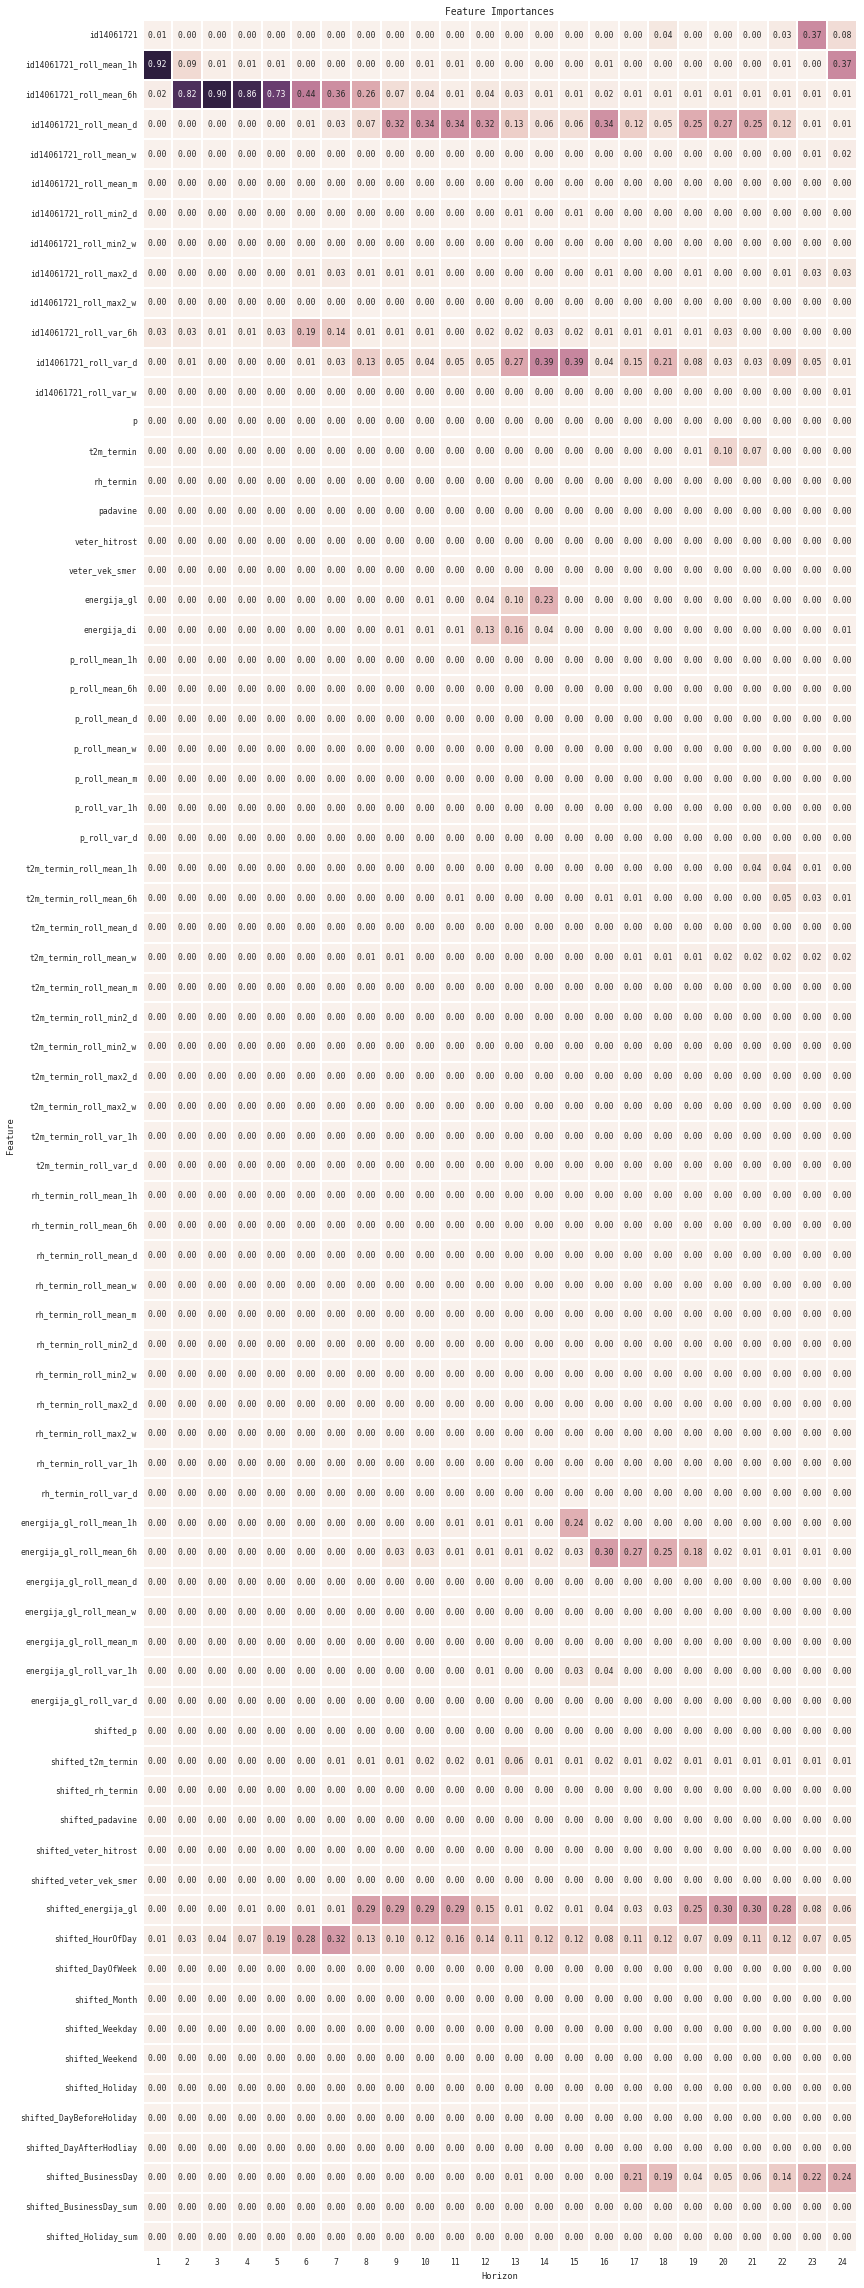

In [168]:
import seaborn as sns
sns.set(context="paper", font="monospace")

f, ax = plt.subplots(figsize=(30, 40))
sns.heatmap(feature_importances, square=True, annot=True, annot_kws={"size": 8}, fmt=".2f", cbar=False)
plt.title("Feature Importances")

In [97]:
for horizon in range (1,2):
    print "\nWorking on prediction horizon: {}h".format(horizon)
        
    data[shiftedColumns] = data[columnsToShift].shift(horizon, freq='H')
    data.dropna(inplace=True)
    
    training_data = data[:splitting_time]
    testing_data = data[splitting_time:]
    
    for data_set in data_sets:
        print "Dataset:\t {}".format(data_set['name'])
        model = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, n_jobs=7)
        
        X_train = training_data[data_set['cols']].values
        y_train = training_data[["shifted_" + target_col]].values.ravel()

        X_test = testing_data[data_set['cols']].values
        y_test = testing_data[["shifted_" + target_col]].values.ravel()

        start = time.time() # Start measuring time
        model.fit(X_train,y_train)
        runtime = time.time() - start # Calculate runtime
    
        importances = model.feature_importances_ # Array of feature importances
        indices = np.argsort(importances)[::-1] # Returns the indices that would sort importances array
        sorted_ftrs = importances[indices] # Sprted array
        
        #print importances
        #print training_data[data_set['cols']].columns
        #print indices
        #print sorted_ftrs
        #print training_data[data_set['cols']].columns[indices]
        
        print "\nUnsorted features:"
        for idx, importance in enumerate(importances):
            print "{}: {:.3f}".format(training_data[data_set['cols']].columns[idx], importance)
            feature_importances.loc[training_data[data_set['cols']].columns[idx]]
            
        print "\nSorted features:"
        for idx in indices:
            print "{}:  {:.3f}".format(training_data[data_set['cols']].columns[idx], importances[idx])

        #for metric in error_metrics:

            #error = metric['function'](y_test, model.predict(X_test))
            #validation_df.loc[horizon, (data_set['name'], metric['short'])] = error
            #print "{}: {:.3f}".format(metric['name'], error)


Working on prediction horizon: 1h
Dataset:	 all_cols

Unsorted features:
id14061721: 0.006
id14061721_roll_mean_1h: 0.921
id14061721_roll_mean_6h: 0.017
id14061721_roll_mean_d: 0.000
id14061721_roll_mean_w: 0.001
id14061721_roll_mean_m: 0.000
id14061721_roll_min2_d: 0.000
id14061721_roll_min2_w: 0.000
id14061721_roll_max2_d: 0.000
id14061721_roll_max2_w: 0.000
id14061721_roll_var_6h: 0.029
id14061721_roll_var_d: 0.001
id14061721_roll_var_w: 0.000
p: 0.000
t2m_termin: 0.001
rh_termin: 0.000
padavine: 0.000
veter_hitrost: 0.000
veter_vek_smer: 0.000
energija_gl: 0.000
energija_di: 0.000
p_roll_mean_1h: 0.000
p_roll_mean_6h: 0.000
p_roll_mean_d: 0.000
p_roll_mean_w: 0.000
p_roll_mean_m: 0.000
p_roll_var_1h: 0.000
p_roll_var_d: 0.000
t2m_termin_roll_mean_1h: 0.000
t2m_termin_roll_mean_6h: 0.000
t2m_termin_roll_mean_d: 0.000
t2m_termin_roll_mean_w: 0.001
t2m_termin_roll_mean_m: 0.000
t2m_termin_roll_min2_d: 0.000
t2m_termin_roll_min2_w: 0.000
t2m_termin_roll_max2_d: 0.000
t2m_termin_roll_m

C:\Python27\lib\site-packages\IPython\kernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


KeyboardInterrupt: 